### Lista de trechos de código que abrangem a maioria das técnicas que encontrei on-line e que utilizei ao longo do tempo, essenciais para a maioria dos projetos em que trabalhei. Essas técnicas se aplicam principalmente a modelos de árvore de decisão e regressão (não deep learning).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import missingno as msno
from numpy import random
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('titanic.csv')
df1 = pd.read_csv('titanic.csv')
df2 = pd.read_csv('titanic.csv')

## Substituindo valores NaN

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Imputação Media/Mediana 

In [4]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
df['Age'].fillna((df['Age'].median()), inplace=True)
print('Now Age has {} null values.'.format(df.isnull().sum()['Age']))

Now Age has 0 null values.


### Substituindo com 0 ou -1

In [5]:
df['Age'].fillna(value=0, inplace=True)

### Substituindo com Random number. Imputação de amostragem aleatória. 

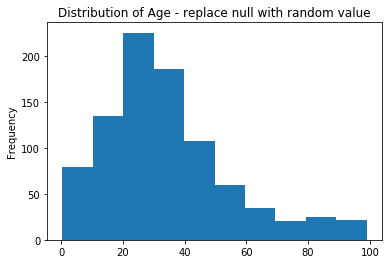

In [6]:
null_rows = df1['Age'].isnull()
num_null_rows = sum(null_rows)
rand = random.randint(1, 101, size=num_null_rows)
df1.loc[null_rows, 'Age'] = rand
df1['Age'].plot.hist(title='Distribution of Age - replace null with random value')
plt.show()

### Indicando falta
- Também poderíamos usar uma variável 0/1 adicional para indicar ao nosso modelo quando falta Idade.

In [7]:
df['Age_Missing'] = np.where(df['Age'].isnull(), 1, 0)

### Usando regressão para atribuir valores ausentes de atributos

- Usaremos essas variáveis para prever valores ausentes para o Age (poderíamos usar outros, mas precisaríamos converter do texto)


In [11]:
from sklearn.linear_model import LinearRegression
numeric_vars = ['Pclass', 'SibSp', 'Parch', 'Fare']
null_rows = df2[numeric_vars + ['Age']].isnull().any(1)  # rows where Age or any feature var. is null

### Ajuste o modelo de regressão às linhas de dados não nulas, preveja as linhas nulas.

In [17]:
lr = LinearRegression()
lr.fit(df2.loc[~null_rows, numeric_vars], df2.loc[~null_rows, 'Age'])
df2.loc[null_rows, 'Age'] = lr.predict(df2.loc[null_rows, numeric_vars])

# 2 - Recurso de escala (feature scaling)

In [18]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

NameError: name 'x' is not defined

# 3 - Enginering Outliers in Numerical Variables

- Se tivermos motivos para acreditar que os valores discrepantes se devam a erros mecânicos ou problemas durante a medição. Isso significa que, se os valores discrepantes forem de natureza semelhante à falta de dados, qualquer um dos métodos discutidos para dados perdidos poderá ser aplicado para substituir os discrepantes. Como o número de discrepantes é, na natureza, pequeno (caso contrário, não seriam discrepantes), é razoável usar a imputação média / mediana para substituí-los.


### Indentificar outliers com quantil

In [20]:
q25 = df['Age'].quantile(0.25)
q25

22.0

In [21]:
q75 = df['Age'].quantile(0.75)
q75

36.0

In [22]:
IQR = q75-q25
IQR

14.0

#### any value higher than ulimit or below llimit is an outlier

In [23]:
ulimit = q75 +1.5*IQR
ulimit

57.0

In [24]:
llimit = q25 - 1.5*IQR
llimit

1.0

In [25]:
print(ulimit, llimit, 'are the ulimit and llimit')
print('Imply Age outliers:')


57.0 1.0 are the ulimit and llimit
Imply Age outliers:


In [27]:
#outliers
df['Age'][np.bitwise_or(df['Age'] > ulimit, df['Age'] < llimit)]

11     58.000000
33     66.000000
54     65.000000
78      0.830000
94     59.000000
96     71.000000
116    70.500000
159    -6.700118
170    61.000000
180    -6.700118
195    58.000000
201    -6.700118
232    59.000000
252    62.000000
268    58.000000
275    63.000000
280    65.000000
305     0.920000
324    -6.700118
326    61.000000
366    60.000000
438    64.000000
456    65.000000
469     0.750000
483    63.000000
487    58.000000
493    71.000000
545    64.000000
555    62.000000
570    62.000000
587    60.000000
625    61.000000
630    80.000000
644     0.750000
659    58.000000
672    70.000000
684    60.000000
694    60.000000
745    70.000000
755     0.670000
792    -6.700118
803     0.420000
829    62.000000
831     0.830000
846    -6.700118
851    74.000000
863    -6.700118
Name: Age, dtype: float64

## Indentificar outliers com a Média
- O uso da média e do desvio padrão para detectar outliers deve ser feito apenas com dados qie não são muito assimétricos. A idade é um pouco distorcida, então isso pode ser um problema

In [29]:
ulimit = np.mean(df['Age']) + 3 * np.std(df['Age'])
llimit =  np.mean(df['Age']) - 3 * np.std(df['Age'])
ulimit, llimit

(70.14719193742802, -11.585812693006897)

# Discretização

In [30]:
#leia dados e preencha nulos com média 
df = pd.read_csv('train.csv')


In [31]:
not_null = ~df['Age'].isnull()
not_null

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [33]:
### obtenha as aresta usando np.histograma

num_bins = 10
_, bin_edges = np.histogram(df['Age'][not_null], bins=num_bins)
bin_edges

array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
       64.084, 72.042, 80.   ])

In [35]:
#opcional a criação de labels

# = ['Bin_{}'.format(i) for i in range(1, len(intervals))]
labels = [i for i in range(num_bins)]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
#criando novas features com pd.cut 
df ['discrete_Age'] = pd.cut(df['Age'], bins= bin_edges, labels=labels, include_lowest=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,discrete_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


# Aparar (Trimming)

In [39]:
# Let's first remove any missing values
df['Age'].fillna((df['Age'].mean()), inplace=True)
# Get the outlier values
index_of_high_age = df[df.Age > 70].index
# Drop them
df = df.drop(index_of_high_age, axis=0)

# Engineering Labels, Categorical Variables

### Codificação One-Hot e pandas obtem manequins
### Codificaçãp One-Hot

In [40]:
from sklearn.preprocessing import OneHotEncoder 

one = OneHotEncoder(sparse=False).fit_transform(df[['Parch']])
one

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### #Converter a coluna transformada de numpy para um DataFrame e mesclar a nova coluna pela anterior.

In [41]:
onecol = pd.DataFrame(one)
onecol

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
881,1.0,0.0,0.0,0.0,0.0,0.0,0.0
882,1.0,0.0,0.0,0.0,0.0,0.0,0.0
883,0.0,0.0,1.0,0.0,0.0,0.0,0.0
884,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#juntou o dataframe de 0 com o df
results = pd.merge(onecol,df, left_index=True, right_index = True)
results.head()

,0,1,2,3,4,5,6,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,discrete_Age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4



## Get Dummies
- Geralmente, pd.get_dummies é uma abordagem mais fácil para a codificação one-hot

In [44]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


# Dropping First 
- Nos modelos que usam todos os recursos de uma só vez (a maioria dos modelos, exceto os modelos de conjunto de árvores, etc.), é aconselhável descartar a primeira variável dummy, pois ela pode ser derivada das outras (por exemplo, aqui sabemos se alguém é Feminino com base em se eles são do sexo masculino, então podemos tirar do sexo feminino).

In [46]:
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)


# Codificação Média
- Calculamos a média da variável de destino para cada classe da variável que desejamos codificar e substituir essa variável por esses meios.

In [47]:
#Calculando a codificação média

means_pclass = df[['Survived']].groupby(df['Pclass']).apply(np.mean)
means_pclass

,Survived
Pclass,
1,0.633803
2,0.472826
3,0.243354


In [49]:
means_pclass.columns=['Mean Encoding']
means_pclass

,Mean Encoding
Pclass,
1,0.633803
2,0.472826
3,0.243354


In [50]:
# Merge the encoding into our dataframe (by matching Pclass to the index of our prob. ratio dataframe)
df = pd.merge(df, means_pclass, left_on=df.Pclass, right_index=True)

In [51]:
df.head()

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,discrete_Age,Male,Mean Encoding
0,3,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,1,0.243354
2,3,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,3,0,0.243354
4,3,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,4,1,0.243354
5,3,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,NaN,1,0.243354
7,3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0,1,0.243354
